## AmirReza Azari
## 99101087

# **Introduction**

In this assignment, you will work with a dataset that includes The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The target variable of interest in this dataset is the median value of owner-occupied homes (MEDV), which serves as a proxy for the house prices.
First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. By incorporating these regularization techniques, you aim to improve the generalization performance of your regression models and obtain more robust predictions of house prices in the Boston area.

## Imports

In [34]:
import os
import pandas
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

#!wget -O /HousingData.csv "https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0"

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [35]:
file_path = '/HousingData.csv'
# TODO: Load the Dataset and Check for mising values and then impute them with the mean value
df = pd.read_csv(file_path)
print(df.head())

num_of_zero = df.isnull().sum()
print(num_of_zero)
if num_of_zero.any() == 0:
  print("We do not have missing values here!")
else:
  print("Missing values:")
  print(num_of_zero)
  df.fillna(df.mean(), inplace=True)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
We do not have missing values here!


Get a brief description of the dataset

In [36]:
# TODO: you can use .info() and .description()
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.545770   22.92

Extract only the features from the dataframe by removing the target column and then Convert the new dataframe into a numpy array
</br>
Note: **Do not remove the previous dataframe.**


# Preprocessing

In [37]:
# TODO: drop MEDV and convert to numpy array
dropped_df = df.drop(columns=['MEDV'])
dropped_np = np.array(dropped_df.values)
print(type(dropped_np))
print(dropped_np)
print("#########################################################################")
print(dropped_np[:5])
print(dropped_np.shape)

<class 'numpy.ndarray'>
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
#########################################################################
[[6.32000000e-03 1.80000000e+01 2.31000000e+00 0.00000000e+00
  5.38000000e-01 6.57500000e+00 6.52000000e+01 4.09000000e+00
  2.96000000e+02 1.53000000e+01 3.96900000e+02 4.98000000e+00]
 [2.73100000e-02 0.00000000e+00 7.07000000e+00 0.00000000e+00
  4.69000000e-01 6.42100000e+00 7.89000000e+01 4.96710000e+00
  2.42000000e+02 1.78000000e+01 3.96900000e+02 9.14000000e+00]
 [2.72900000e-02 0.00000000e+00 7.07000000e+00 0.00000000e+00
  4.69000000e-01 7.185

look for outliers using box plot and if There are some outliers in data, use StandardScaler can help in scaling data.

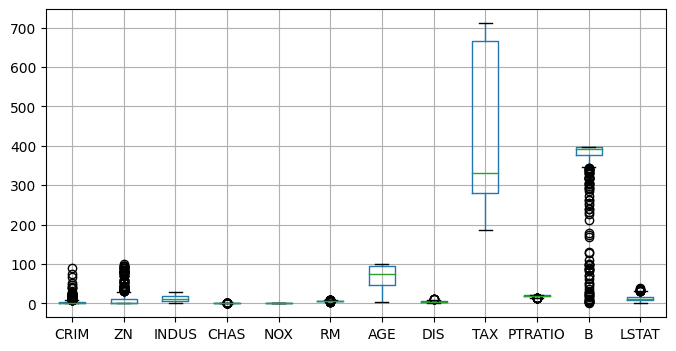

In [38]:
# df.boxplot(figsize=(8, 4))
# plt.title("first data")
# plt.show()

dropped_df.boxplot(figsize=(8, 4))
plt.show()

dropped_MEDV_scalar = StandardScaler().fit_transform(dropped_df)

add polynomial features to increase model complexity!



In [39]:
poly_features = PolynomialFeatures(degree=2)
dropped_MEDV_scalar = poly_features.fit_transform(dropped_MEDV_scalar)
print(dropped_MEDV_scalar)
print(dropped_MEDV_scalar.shape)
print(df.shape)
print(dropped_df.shape)

[[ 1.         -0.42232846  0.29644292 ...  0.19452681 -0.4869857
   1.21913823]
 [ 1.         -0.41986984 -0.48963852 ...  0.19452681 -0.22509205
   0.2604599 ]
 [ 1.         -0.41987219 -0.48963852 ...  0.15715436 -0.49146947
   1.53697447]
 ...
 [ 1.         -0.41595175 -0.48963852 ...  0.19452681 -0.44543526
   1.01997548]
 [ 1.         -0.41023216 -0.48963852 ...  0.16259032 -0.3588854
   0.79216729]
 [ 1.         -0.41751548 -0.48963852 ...  0.19452681 -0.30441561
   0.47638094]]
(506, 91)
(506, 13)
(506, 12)


Extract the target column from the previously mentioned DataFrame and transform it into a new NumPy array, named y.

In [40]:
# TODO: extract the MEDV
y = df['MEDV'].values
print(type(y))
print(y[:5])
print(y.shape)

<class 'numpy.ndarray'>
[24.  21.6 34.7 33.4 36.2]
(506,)




Split the dataset into two parts such that the training set contains 80% of the samples.

In [41]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
X_train, X_test, y_train, y_test = train_test_split(dropped_MEDV_scalar, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (404, 91)
Shape of X_test: (102, 91)
Shape of y_train: (404,)
Shape of y_test: (102,)


# Training


Fit a linear regressor to the data. (Use sklearn)


In [42]:
# TODO: Use sklearn
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Coefficients: [ 6.71326437e-15  2.61543210e+00  8.23937159e-01  2.71362629e-01
 -3.48211983e+00 -1.29409137e+00  3.44585661e+00 -1.21943076e+00
 -1.81707978e+00 -1.35705037e+00 -7.62724086e-01  9.41284776e-02
 -3.26790109e+00  1.88815533e-01 -2.12293611e+00  3.27201664e+00
  2.99592944e+00 -2.33583776e+00  3.47631370e-01  2.08741825e-01
  2.21883471e+00 -2.33322440e+00 -2.04447912e+00  7.41756805e-03
  1.19322150e+00 -8.41126027e-02  1.01385910e-01  2.74709658e-01
 -2.78021092e+00 -1.52798130e-01  7.61588328e-01 -1.08630659e+00
  2.97124880e+00 -2.68640233e-01 -3.02213841e+00 -1.60704564e+00
  1.31321171e+00 -3.11014224e-01 -5.10197825e-01  1.28252455e+00
  1.32809034e+00  1.38205448e+00 -6.50905063e-01 -1.06080996e+00
  7.72225398e-01 -5.06351131e-01  1.37177961e+00 -1.08949576e+00
 -9.50138209e-01 -4.45437289e-01 -1.69626905e+00  5.47158139e-01
 -1.88581634e-01  6.91851939e-03 -4.71226094e-01 -3.79170284e-01
 -1.24093403e+00  3.76740641e-01  3.63408849e+00  1.95669949e+00
 -2.0762819

Get the coefficients of the variables and visualize it

Coefficients:
 [ 6.71326437e-15  2.61543210e+00  8.23937159e-01  2.71362629e-01
 -3.48211983e+00 -1.29409137e+00  3.44585661e+00 -1.21943076e+00
 -1.81707978e+00 -1.35705037e+00 -7.62724086e-01  9.41284776e-02
 -3.26790109e+00  1.88815533e-01 -2.12293611e+00  3.27201664e+00
  2.99592944e+00 -2.33583776e+00  3.47631370e-01  2.08741825e-01
  2.21883471e+00 -2.33322440e+00 -2.04447912e+00  7.41756805e-03
  1.19322150e+00 -8.41126027e-02  1.01385910e-01  2.74709658e-01
 -2.78021092e+00 -1.52798130e-01  7.61588328e-01 -1.08630659e+00
  2.97124880e+00 -2.68640233e-01 -3.02213841e+00 -1.60704564e+00
  1.31321171e+00 -3.11014224e-01 -5.10197825e-01  1.28252455e+00
  1.32809034e+00  1.38205448e+00 -6.50905063e-01 -1.06080996e+00
  7.72225398e-01 -5.06351131e-01  1.37177961e+00 -1.08949576e+00
 -9.50138209e-01 -4.45437289e-01 -1.69626905e+00  5.47158139e-01
 -1.88581634e-01  6.91851939e-03 -4.71226094e-01 -3.79170284e-01
 -1.24093403e+00  3.76740641e-01  3.63408849e+00  1.95669949e+00
 -2.076281

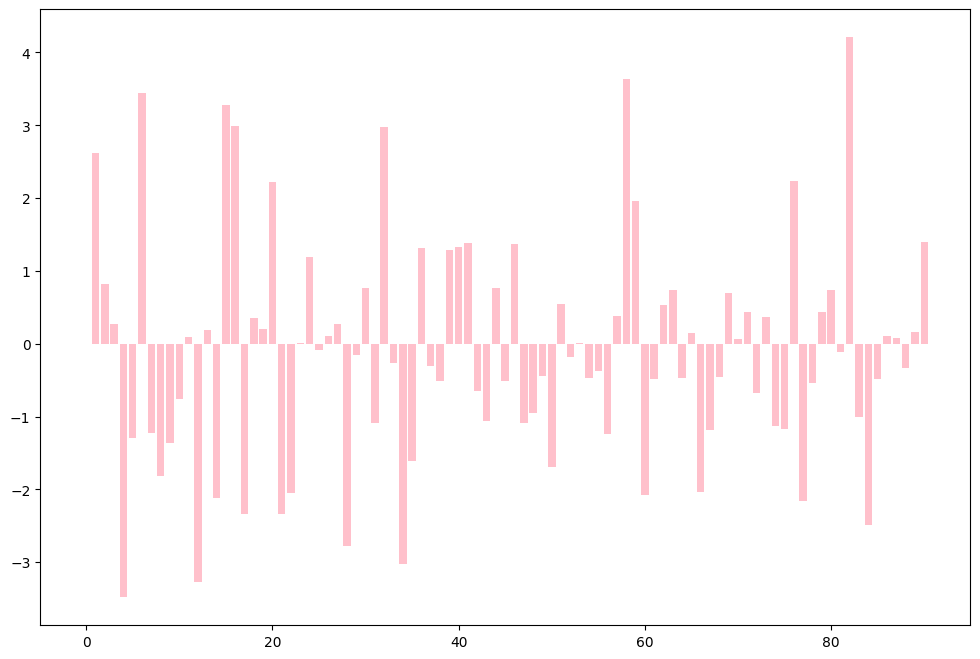

In [43]:
coefficients =  regressor.coef_
print("Coefficients:\n",coefficients)

plt.figure(figsize=(12, 8))
plt.bar(range(len(coefficients)), coefficients, color='pink')
plt.show()

Get the score value of sklearn regressor on train dataset</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [44]:
# TODO: Calculate R² score and MSE on the training dataset
y_train_pred1 = regressor.predict(X_train)

r2_train = r2_score(y_train, y_train_pred1)

mse_train = mean_squared_error(y_train, y_train_pred1)

print("R² score on the training dataset:", r2_train)
print("MSE on the training dataset:", mse_train)

R² score on the training dataset: 0.9233615957926449
MSE on the training dataset: 6.65783903781899


Predict the value of "y" for each "x" belonging to the "testing" set

In [45]:
y_test_pred1 = regressor.predict(X_test)
r2_test_linear = r2_score(y_test, y_test_pred1)
print(y_test_pred1)

[26.60760472 39.62214268 18.71401934 21.00627478 15.36932115 18.14967249
 19.2680689  14.04520907 20.41411804 19.68358046 19.34721612 17.80080883
  9.52923494 17.56130221 17.61765281 23.1886407  19.83784911  9.82571722
 48.00938013 13.01200313 24.67113881 28.75366122 15.14797668 19.48768303
 16.8711114  16.54597743 17.07120558 13.34377675 16.66485127 19.34855953
 18.50229727 23.95889069 15.48239335 25.70102382 13.69224402 17.48588361
 33.1589375  20.10130817 20.24277819 21.68697931 16.91569466 31.33039866
 53.78155342 15.35787882 27.30502419 15.90970181 14.76748839 23.49841731
 17.57527936 29.19894908 19.95253249 33.61207695 17.02933983 26.86934524
 44.01327048 23.0722288  13.43102214 32.42020215 25.15187612 12.20309801
 25.03914004 29.01333968 31.99975955 14.25741358 27.2478974  13.81980117
 14.35877776 24.56841459 29.12596225 12.07120755 21.52505912 27.39851469
  9.60239834 22.99803726 19.8464662   7.55139317 22.13069349 49.95089019
 11.35178549 11.98183645 18.34848076 12.31262512 15

# Lasso Regularization(L1)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [46]:
# TODO: Use Lasso from sklearn library
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

Get the coefficients of the variables and visualize it.

Coefficients: 
 [ 0.         -0.          0.         -0.          0.         -0.
  2.71044561 -0.         -0.         -0.17551806 -0.87919831  0.
 -3.61571562 -0.09172222  0.         -0.          0.         -0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
  0.          0.         -0.         -0.          0.          0.
  0.         -0.          0.         -0.          0.21657471 -0.
 -0.          0.         -0.          0.09712834  0.          0.
 -0.         -0.20798319 -0.1485112  -0.          0.         -0.
 -0.          0.         -0.          0.7562266  -0.          0.
 -0.85199921 -0.59720675  0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.          0.26961623  0.          0.         -0.
 -0.8353172   0.         -0.         -0.         -0.24304235 -0.
  0.46962

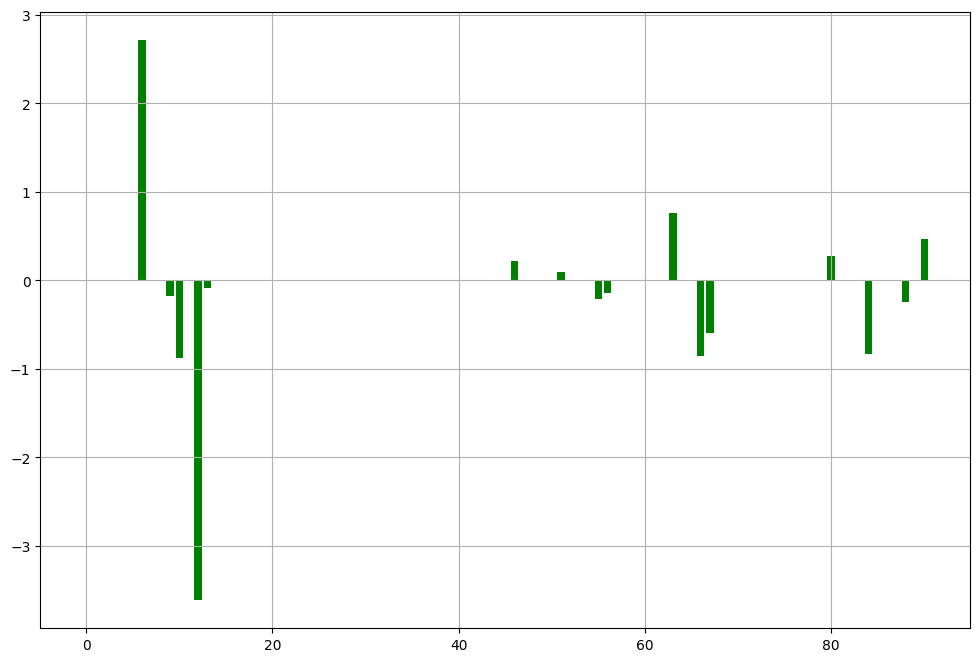

In [47]:
coefficients = lasso.coef_
print("Coefficients: \n", coefficients)

# Visualize the coefficients
plt.figure(figsize=(12, 8))
plt.bar(range(len(coefficients)), coefficients, color='green')
plt.grid(True)
plt.show()

1- What observations can you make about the weight distribution when applying L1 regularization?

2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?

    Your Answer Goes here.

1. Upon implementing L1 regularization, commonly referred to as Lasso regularization, it becomes apparent that numerous coefficients in the model tend to converge precisely to zero (generally decrease). Consequently, a sparse model emerges, wherein only select features are deemed significant for predicting the target variable. The distribution of weights tends to centralize more around zero in comparison to models devoid of regularization. This phenomenon arises due to L1 regularization augmenting the loss function with a penalty term proportional to the absolute value of the coefficients, thereby promoting sparsity by diminishing less consequential coefficients to zero.
Summerizely, when we apply L1 regularization, also known as Lasso regularization, we notice that it tends to encourage sparsity in the weight distribution. Essentially, L1 regularization helps in feature selection by shrinking less important feature coefficients towards zero.

2. Controls the strength of regularization applied to the model.
 Increasing the value of alpha strengthens the regularization penalty. As a result, the model becomes more regularized, leading to more sparsity in the weights. Lower values of alpha result in weaker regularization, allowing more coefficients to retain non-zero values.


Get the score value on train *dataset*


In [48]:
# TODO: Calculate R² score and MSE on the training dataset
y_train_pred2 = lasso.predict(X_train)

r2_train_lasso = r2_score(y_train, y_train_pred2)

mse_train_lasso = mean_squared_error(y_train, y_train_pred2)

print("R² score on the training dataset:", r2_train_lasso)
print("MSE on the training dataset:", mse_train_lasso)

R² score on the training dataset: 0.8171286694481938
MSE on the training dataset: 15.88665494849732


Predict the value of "y" for each "x" belonging to the "testing" set

In [49]:
y_train_pred2 = lasso.predict(X_test)
print(y_train_pred2)
r2_test_lasso = r2_score(y_test, y_train_pred2)

[25.01553605 32.02170508 16.56431707 23.67545781 17.13464034 21.69118954
 18.08272601 14.79576716 20.40693987 19.6387817  21.53217387 19.92343501
  6.64235117 21.28994714 19.61841959 22.15653103 18.10047426 11.57157362
 42.41465504 16.42067495 21.39943226 25.60136064 15.78693485 22.04815612
 17.9021186  17.00238679 19.88982538 13.39822411 21.17351703 19.18396855
 18.45930572 24.45954182 22.28497567 22.26103013 14.87175003 17.51351063
 32.12600448 20.57590791 22.56516819 20.96313305 15.55620789 27.56743981
 44.34319575 18.69292057 24.52131935 17.12080258 16.94276939 24.60012608
 18.02835641 28.77188928 21.29219328 31.99034286 17.89886858 25.3993675
 39.45589001 22.16073425 17.33354312 28.94005254 23.43768009 17.00480941
 24.78746672 31.5308728  28.44268606 19.11754198 26.06453555 17.74025689
 17.46661041 24.07595784 27.21904407 12.41794401 18.96854429 25.30678507
 12.52088818 21.93187535 22.04846018  8.76834845 20.47808211 41.66158441
 15.06191799 13.48259615 21.44899084 12.04377305 21.

# Ridge Regularization(L2)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [50]:
# TODO: Use Ridge from sklearn library
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

Get the coefficients of the variables and visualize it.

Coefficients: 
 [ 0.          0.05912156  0.51116396 -0.28467561 -0.32455353 -0.85827735
  3.30888276 -1.15903729 -1.59593251 -0.53180157 -0.91042787  0.42828162
 -2.94077889  0.16087076 -0.2517118   0.62754054  1.60530016 -1.09008989
  0.19857273 -0.21466179  0.91315274 -0.33329639 -0.37069977 -0.0685445
  0.53227529  0.13451302  0.04174477  0.21402759 -0.19753069 -0.13818418
  0.11128147 -0.41118718  0.69356948 -0.05349153 -0.33153368 -0.6523907
  0.65774546  0.00626011  0.17510478  0.56882038  0.84405893  0.75253857
 -0.01735362 -0.74138428  0.38541275 -0.84892644  0.44774634 -0.95605317
 -0.87633987 -0.11780543 -0.84245313  0.77371237 -0.05986682 -0.05282303
 -0.5612907  -0.35054369 -1.10824908 -0.28920456  0.95796985  0.161939
 -0.72743981 -0.23024552  0.59678367  0.61007814 -0.35547651  0.25507285
 -1.39082276 -1.30777268 -0.34506817  0.43935663  0.18768566  0.33640313
  0.12071674  0.17082987 -0.88889616 -0.93434533  1.1011708  -0.55229718
 -0.01954442 -0.25679014  0.78714857  0

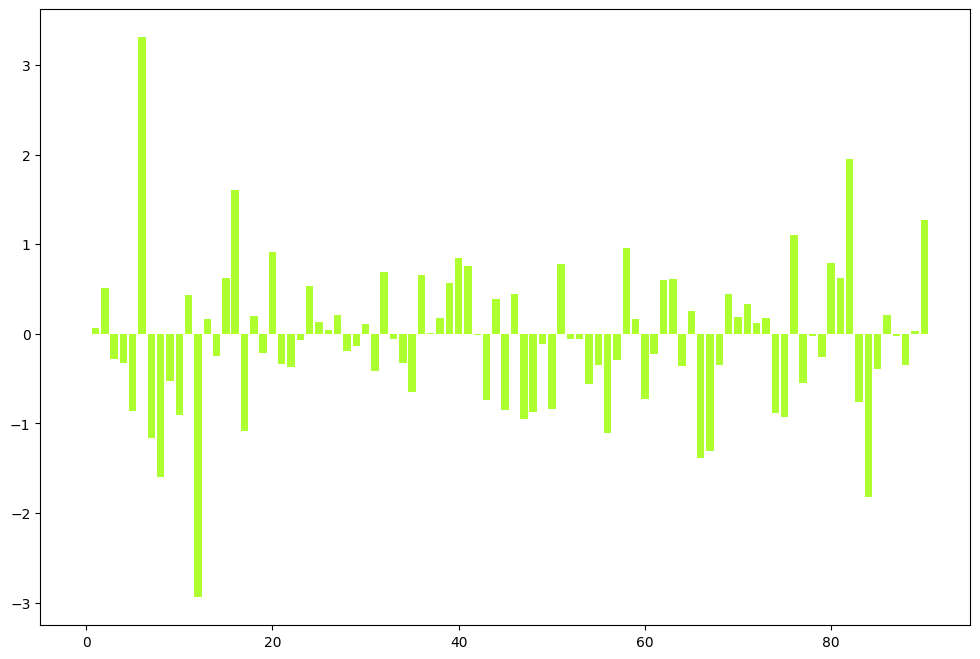

In [51]:
coefficients = ridge.coef_
print("Coefficients: \n", coefficients)

plt.figure(figsize=(12, 8))
plt.bar(range(len(coefficients)), coefficients, color='greenyellow')
plt.show()

Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?

 How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?

        Your answer goes here
        
        **L1 Regularization** =>
          Encourages sparsity in the coefficient weights by setting many of them exactly to zero.
          Useful for feature selection and building simpler, more interpretable models.
        **L2 Regularization** =>
          Shrinks the coefficient weights towards zero but rarely sets them exactly to zero.
          Generally more stable and less sensitive to correlated features compared to L1 regularization.
        =>
        The sparsity of weights in L2 regularization is notably lower compared to L1 regularization.
        Ridge regularization typically yields models with non-zero coefficients
        for all features, albeit some coefficients may approach zero.
        Conversely, L1 regularization results in a model with only a subset of
        non-zero coefficients. Moreover, there is less variation in the
        magnitudes of weights in L2 regularization, whereas in L1
        regularization, magnitudes exhibit higher variance.
        In high-dimensional datasets with numerous irrelevant features,
        L1 regularization aids in preventing overfitting by effectively
        disregarding less significant features and setting their weights to
        zero. On the other hand, L2 regularization, while also addressing
        overfitting by penalizing large coefficients, does not perform feature
        selection. This characteristic can be advantageous when all features
        are potentially relevant, as it strives to evenly shrink coefficients
        toward zero across all features. Additionally, L2 regularization
        distributes coefficient values more uniformly among correlated
        features, rendering it more robust than L1 regularization.
        The latter tends to arbitrarily select one of the correlated
        features and nullify the other coefficients.

        **Influence of Regularization Parameter on Ridge Regression**
        =>
        - The regularization parameter, controls the strength of regularization applied in Ridge Regression.
        - As the regularization parameter becomes larger,
        the coefficients are shrunk more aggressively towards zero, leading to smaller overall magnitudes.
        - Decreasing the regularization parameter reduces the regularization effect,
        allowing the coefficients to retain larger magnitudes.
        Totally ==>
        Elevating the regularization parameter typically leads to the
        contraction of coefficients toward zero, whereas reducing it
        permits coefficients to amplify in magnitude. The magnitude of this
        parameter influences the balance between model
        complexity and generalization.

Get the score value on train *dataset*

In [52]:
# TODO: Calculate R² score and MSE on the training dataset
y_train_pred3 = ridge.predict(X_train)

r2_train_ridge = r2_score(y_train, y_train_pred3)

mse_train_ridge = mean_squared_error(y_train, y_train_pred3)

print("R² score on the training dataset:", r2_train_ridge)
print("MSE on the training dataset:", mse_train_ridge)

R² score on the training dataset: 0.9143940529441623
MSE on the training dataset: 7.4368800090845655


Predict the value of "y" for each "x" belonging to the "testing" set



In [53]:
y_train_pred3 = ridge.predict(X_test)
print(y_train_pred3)

[26.64874045 37.58387034 19.27657644 21.94197185 15.3028101  20.12028532
 19.06550135 13.09220054 21.53629599 19.59853597 19.98066811 17.71773856
  7.45618135 19.4698435  17.83085991 22.41342776 19.03460611 10.83733093
 47.87734976 13.23733086 25.94978663 28.67626209 15.62739061 20.87266644
 16.88618107 16.70243714 18.15202381 12.99400863 19.06044753 19.1619615
 18.49185044 23.96483655 16.81029968 24.22140047 14.71608764 17.14764076
 33.00621736 20.36005585 21.56765845 22.00579786 16.87716829 30.83029389
 52.86535583 16.40416721 26.70438602 16.00962769 15.37456958 24.22203195
 18.0413712  28.35774744 18.65466298 33.07812494 17.01116837 25.34703163
 43.22198358 23.00525594 14.66623572 32.34427145 25.00498764 14.21572885
 24.95594853 33.4162596  30.78344757 16.16942493 25.19231399 16.02456508
 14.58662856 24.41159615 30.32473275 12.3838725  20.94435871 27.5999913
 10.37505112 21.25995733 20.86051995  5.76335445 20.67914828 49.65506758
 11.15867412 13.79119622 19.12026295 12.02135127 17.9

# Summarization

Summarize the performance metrics (e.g., RMSE, R² score) of the basic regression model, Lasso regression, and Ridge regression in a table for easy comparison.(On both test and train data)</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)


In [54]:
# HINT: Use DataFrame tools
mse_test1 = mean_squared_error(y_test, y_test_pred1)
r2_test1 = r2_score(y_test, y_test_pred1)

mse_test2 = mean_squared_error(y_test, y_train_pred2)
r2_test2 = r2_score(y_test, y_train_pred2)

mse_test3 = mean_squared_error(y_test, y_train_pred3)
r2_test3 = r2_score(y_test, y_train_pred3)


data = {
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'MSE(Test)': [mse_test1, mse_test2, mse_test3],
    'MSE(Train)': [mse_train, mse_train_lasso, mse_train_ridge],
    'R² Score (Test)': [r2_test1, r2_test2, r2_test3],
    'R² Score (Train)': [r2_train, r2_train_lasso, r2_train_ridge]
}

df = pd.DataFrame(data)
print(df)

               Model  MSE(Test)  MSE(Train)  R² Score (Test)  R² Score (Train)
0  Linear Regression  18.122077    6.657839         0.752882          0.923362
1   Lasso Regression  16.227427   15.886655         0.778718          0.817129
2   Ridge Regression  15.110037    7.436880         0.793955          0.914394


 *Which model performed best on the test data?</br>
Why the results on train data are different? </br>
Discuss why this might be the case.*

          your answer goes here.

          =>
          1. Ridge Regression model has the lowest MSE on the test data and it performed best on the test data.

          =>
          2. Because each regression technique imposes distinct constraints on the model parameters during training.

          Differences in training performance among models are primarily
          influenced by the regularization techniques they employ. Linear
          Regression, devoid of any regularization, exhibits lower bias but
          higher variance compared to regularized models. It seeks to minimize
          the mean squared error (MSE) between observed and predicted values
          without penalizing coefficients. Consequently, it may yield lower
          MSE on training data but is susceptible to overfitting.

          
          In contrast, Lasso Regression employs L1 regularization, introducing
          a penalty term based on the absolute values of coefficients. This
          promotes sparsity in coefficient values, yielding simpler models with
          fewer non-zero coefficients. Despite potentially leading to higher
          training error compared to Linear Regression, Lasso Regression may
          generalize better to unseen data.

          
          Ridge Regression utilizes L2 regularization, penalizing the squared
          magnitudes of coefficients. While it tends to achieve lower training
          error compared to Lasso Regression, it may exhibit slightly higher
          training error compared to Linear Regression due to the
          regularization penalty. Unlike Lasso Regression, Ridge Regression
          does not enforce sparsity as aggressively.

          So, Basic Regression might have the lowest error when looking at the
          data it was trained on, but it tends to memorize the training data
          too much and doesn't do well with new data. Lasso Regression can
          ignore less important things and might not be as accurate with the
          training data, but it could do better with new data. Ridge Regression
          finds a middle ground by being careful not to memorize too much of
          the training data, and it usually performs the best when faced with
          new data.
